In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(0)

In [3]:
pd.options.mode.copy_on_write = True

# Data Combination

Combining data in pandas is essential for effective data manipulation and analysis. Pandas offers some methods to combine and compare Series or DataFrame objects, each serving different purposes and use cases:

- `pandas.merge`: Similar to performing joins in SQL databases, this method connect rows in DataFrames based on one or more keys, .

- `pandas.concat`: This method concatenates objects along an axis, allowing you to append or combine data structures seamlessly.

- `combine_first`: This method splices together overlapping data, filling in missing values in one object with values from another.

Let's delve a little deeper into each of these methods.

## `merge`

Merge (or join) operations combine datasets by linking rows using one or more keys.

By default, `pandas.merge` performs an inner join on overlapping column names as the keys. However, it's recommended explicitly specify both the join method and the keys. You can do this by passing a column name or a list of columns to be used as keys. If the column names differ between the DataFrames, you can specify them separately using the `left_on` and `right_on` parameters.

Besides the default "inner join", merge supports other join options such as "left", "right", and "outer".

Moreover, to handle overlapping column names, you can use the `suffixes` option to specify strings to append to overlapping names in the left and right DataFrame objects.

The `pandas.merge` method offers a variety of parameters to control its behavior for different scenarios. The most commonly used parameters include:

- `how`: Type of merge to be performed ("left", "right", "outer", "inner").
- `on`: Column or index level names to join on. These must be found in both DataFrames.
- `left_on`: Column or index level names to join on in the left DataFrame.
- `right_on`: Column or index level names to join on in the right DataFrame.
- `suffixes`: A tuple of string suffixes to apply to overlapping columns.

In [4]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df1

,key,value1
0,A,1
1,B,2
2,C,3


In [5]:
df2 = pd.DataFrame({'key': ['B', 'C', 'D'], 'value2': [4, 5, 6]})
df2

,key,value2
0,B,4
1,C,5
2,D,6


In [6]:
# One-to-one inner join

pd.merge(df1, df2, on='key')

,key,value1,value2
0,B,2,4
1,C,3,5


In [7]:
# One-to-one left join

pd.merge(df1, df2, on='key', how='left')

,key,value1,value2
0,A,1,NaN
1,B,2,4.0
2,C,3,5.0


In [8]:
# One-to-one right join

pd.merge(df1, df2, on='key', how='right')

,key,value1,value2
0,B,2.0,4
1,C,3.0,5
2,D,NaN,6


In [9]:
# One-to-one outer join

pd.merge(df1, df2, on='key', how='outer')

,key,value1,value2
0,A,1.0,NaN
1,B,2.0,4.0
2,C,3.0,5.0
3,D,NaN,6.0


In [10]:
# Joining on multiple keys

df1 = pd.DataFrame({
    'key1': ['A', 'B', 'C'],
    'key2': ['X', 'Y', 'Z'],
    'value1': [1, 2, 3]
})
df2 = pd.DataFrame({
    'key1': ['A', 'B', 'C'],
    'key2': ['X', 'Y', 'Q'],
    'value2': [4, 5, 6]
})

pd.merge(df1, df2, on=['key1', 'key2'])

,key1,key2,value1,value2
0,A,X,1,4
1,B,Y,2,5


In [11]:
# Specifying keys with different names

df1 = pd.DataFrame({'key1': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'key2': ['B', 'C', 'D'], 'value2': [4, 5, 6]})

pd.merge(df1, df2, left_on='key1', right_on='key2')

,key1,value1,key2,value2
0,B,2,B,4
1,C,3,C,5


In [12]:
# Specifying suffixes for overlapping column labels
# By default uses _x, _y

df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['B', 'C', 'D'], 'value': [4, 5, 6]})

pd.merge(df1, df2, on='key', suffixes=('_left', '_right'))

,key,value_left,value_right
0,B,2,4
1,C,3,5


### Merging on Index

In some cases, the merge key(s) in a DataFrame can be in the Index. In such cases, you can use the parameters `left_index=True` or `right_index=True` (or both) to indicate that the index should be used as the merge key.

In [13]:
df1 = pd.DataFrame({'value1': [1, 2, 3]}, index=['A', 'B', 'C'])
df2 = pd.DataFrame({'value2': [4, 5, 6]}, index=['B', 'C', 'D'])

pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

,value1,value2
B,2,4
C,3,5


## `validate`

Joins between different datasets can result in a variety of data integrity issues. The `validate` parameter checks if the merge operation satisfies specific conditions regarding the uniqueness of the merge keys in the left and right datasets.

- `"1:1"`: Checks if merge keys are unique in both left and right datasets.
- `"1:m"`: Checks if merge keys are unique in the left dataset.
- `"m:1"`: Checks if merge keys are unique in the right dataset.
- `"m:m"`: Allowed, but does not result in any uniqueness checks.

In [14]:
# Validate "1:1" merge

df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value2': [4, 5, 6]})

pd.merge(df1, df2, on='key', validate='1:1')

,key,value1,value2
0,A,1,4
1,B,2,5
2,C,3,6


In [15]:
# Validate "1:m" merge

df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['A', 'A', 'B', 'C', 'C', 'C'], 'value2': [4, 5, 6, 7, 8, 9]})

pd.merge(df1, df2, on='key', validate='1:1')

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [16]:
pd.merge(df1, df2, on='key', validate='1:m')

,key,value1,value2
0,A,1,4
1,A,1,5
2,B,2,6
3,C,3,7
4,C,3,8
5,C,3,9


## `concat`

Another kind of data combination operation is commonly called concatenation or stacking, which in pandas is done using the `concat` method.

The `pandas.concat` method provides a consistent way to concatenate an arbitrary number of Series or DataFrame objects along a specified axis while performing optional set logic (union or intersection) of the indexes on the other axes. For DataFrame objects that don’t have a meaningful index, the `ignore_index=True` parameter can be used to ignore overlapping indexes.

By default, `pandas.concat` works along `axis=0` (index), producing another Series or DataFrame. If you pass `axis=1` (columns), the result will be a DataFrame.

As expected, the `pandas.concat` method offers a variety of parameters to control its behavior for different scenarios. The most commonly used parameters include:

- `objs`: The sequence or mapping of Series or DataFrame objects to be concatenated.
- `axis`: The axis to concatenate along (`0` for index, `1` for columns).
- `join`: How to handle indexes on other axes (`"outer"` for union, `"inner"` for intersection). Default is `"outer"`.
- `ignore_index`: If `True`, do not use the index values along the concatenation axis. The resulting axis will be labeled 0, …, n - 1.

In [17]:
s1 = pd.Series([1, 2, 3], index=['A', 'B', 'C'])
s2 = pd.Series([4, 5, 6], index=['D', 'E', 'F'])

s1, s2

(A    1
 B    2
 C    3
 dtype: int64,
 D    4
 E    5
 F    6
 dtype: int64)

In [18]:
# Concat on index 

pd.concat([s1, s2])

A    1
B    2
C    3
D    4
E    5
F    6
dtype: int64

In [19]:
pd.concat([s1, s2], axis='columns')

,0,1
A,1.0,NaN
B,2.0,NaN
C,3.0,NaN
D,NaN,4.0
E,NaN,5.0
F,NaN,6.0


In [20]:
# Concatenating DataFrames along columns

df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'C': [7, 8, 9], 'D': [10, 11, 12]})

pd.concat([df1, df2], axis='columns')

,A,B,C,D
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [21]:
# Using join="inner" to intersect indexes

df1 = pd.DataFrame({'A': [1, 2]}, index=['A', 'B'])
df2 = pd.DataFrame({'B': [3, 4]}, index=['B', 'C'])

pd.concat([df1, df2], join='inner', axis='columns')

,A,B
B,2,3


In [22]:
# Ignoring index with ignore_index=True

df1 = pd.DataFrame({'A': [1, 2, 3]}, index=['a', 'b', 'c'])
df2 = pd.DataFrame({'A': [4, 5, 6]}, index=['b', 'c', 'd'])

In [23]:
pd.concat([df1, df2])

,A
a,1
b,2
c,3
b,4
c,5
d,6


In [24]:
pd.concat([df1, df2], join='inner', ignore_index=True)

,A
0,1
1,2
2,3
3,4
4,5
5,6


## `combine_first`

This method is particularly useful for data alignment and ensuring completeness when dealing with datasets that have missing values.


The `DataFrame.combine_first` method is used to combine DataFrame objects by splicing together overlapping data to fill in missing values in one object with values from another. It takes two objects and uses the values from the calling object to fill in any missing values in the other object. If the calling object has a missing value in a particular position, the value from the other object is used.

Furthermore, while you can use `fillna` to fill missing values, `combine_first` allows for combining two full objects, making it more versatile for aligning and combining datasets with overlapping but not necessarily identical indexes.

In [25]:
df1 = pd.DataFrame({
    'A': [1, 2, None],
    'B': [None, 5, 6]
})

In [26]:
df1

,A,B
0,1.0,NaN
1,2.0,5.0
2,NaN,6.0


In [27]:
df2 = pd.DataFrame({
    'A': [3, 4, 5],
    'B': [7, 8, None]
})

In [28]:
df2

,A,B
0,3,7.0
1,4,8.0
2,5,NaN


In [29]:
df1.combine_first(df2)

,A,B
0,1.0,7.0
1,2.0,5.0
2,5.0,6.0


## `combine`

A more generic and flexible method than `combine_first` is `combine`. It method allows the usage of custom combination logic through a specified function for combining two DataFrames or Series.

The `combine` method takes another Series or DataFrame and a function as arguments. This function is applied element-wise to the paired elements from both objects, allowing for custom combination logic. You can also specify a `fill_value` to replace missing values before the function is applied.

In [30]:
df1 = pd.DataFrame({
    'A': [1, 2, None],
    'B': [None, 5, 6]
})
df1

,A,B
0,1.0,NaN
1,2.0,5.0
2,NaN,6.0


In [31]:
df2 = pd.DataFrame({
    'A': [3, 4, 5],
    'B': [7, 8, None]
})
df2

,A,B
0,3,7.0
1,4,8.0
2,5,NaN


In [32]:
# Note that if some value over comparison is NaN
# the result is NaN
#
# You can fill values before the combination using
# fill_value parameter

df1.combine(df2, np.maximum)

,A,B
0,3.0,NaN
1,4.0,8.0
2,NaN,NaN


# References

- [Python for Data Analysis by Wes McKinney (3e)](https://wesmckinney.com/book/)
- [Pandas Official Documentation](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Frequently Asked Questions (FAQ) on Pandas](https://pandas.pydata.org/docs/user_guide/gotchas.html)

# Appendix: Joining Datasets

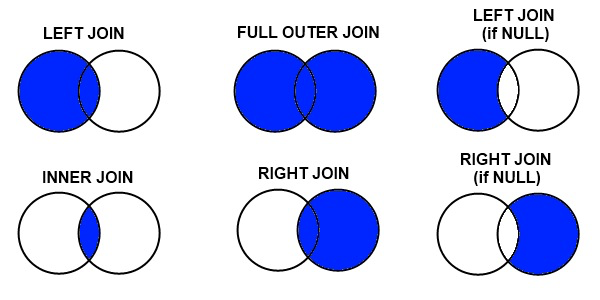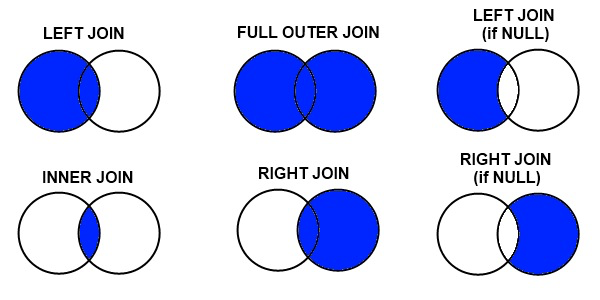

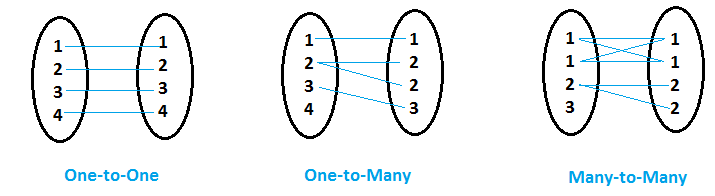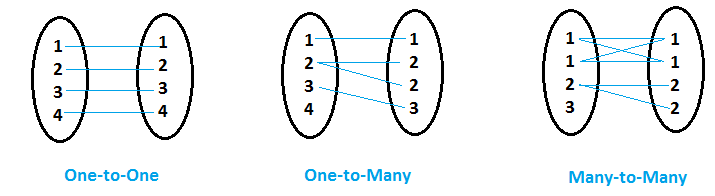

# Exercises

1. Join the recipes and ingredients DataFrames on recipe_id to find matching recipes and their primary ingredients.

In [33]:
recipes = pd.DataFrame({
    'recipe_id': [1, 2, 3],
    'recipe_name': ['Spaghetti Bolognese', 'Chicken Curry', 'Apple Pie']
})
recipes

,recipe_id,recipe_name
0,1,Spaghetti Bolognese
1,2,Chicken Curry
2,3,Apple Pie


In [34]:
ingredients = pd.DataFrame({
    'ingredient_id': [101, 102, 103],
    'recipe_id': [1, 2, 3],
    'ingredient_name': ['Beef', 'Chicken', 'Apple']
})
ingredients

,ingredient_id,recipe_id,ingredient_name
0,101,1,Beef
1,102,2,Chicken
2,103,3,Apple


2. (Left Inner Join) Join restaurants and menus on restaurant_id to include all restaurants and their menus

In [35]:
restaurants = pd.DataFrame({
    'restaurant_id': [1, 2, 3],
    'restaurant_name': ['Italian Bistro', 'Indian Delight', 'Bakery Corner']
})
restaurants

,restaurant_id,restaurant_name
0,1,Italian Bistro
1,2,Indian Delight
2,3,Bakery Corner


In [36]:
menus = pd.DataFrame({
    'menu_id': [201, 202, 203, 204],
    'restaurant_id': [1, 1, 2, 3],
    'menu_item': ['Lasagna', 'Pizza', 'Tandoori Chicken', 'Croissant']
})
menus

,menu_id,restaurant_id,menu_item
0,201,1,Lasagna
1,202,1,Pizza
2,203,2,Tandoori Chicken
3,204,3,Croissant


3. (Outer Join with Multiple Keys) Join farmers_market and produce_stand on vendor_id and produce_name to include all records.  Include vendors and produce even if they don't have matching entries in the other DataFrame.


In [37]:
farmers_market = pd.DataFrame({
    'vendor_id': [1, 2, 3],
    'produce_name': ['Apples', 'Carrots', 'Lettuce'],
    'quantity': [50, 100, 75]
})
farmers_market

,vendor_id,produce_name,quantity
0,1,Apples,50
1,2,Carrots,100
2,3,Lettuce,75


In [38]:
produce_stand = pd.DataFrame({
    'stand_id': ['A', 'B', 'C'],
    'vendor_id': [1, 2, 4],
    'produce_name': ['Apples', 'Carrots', 'Potatoes'],
    'price_per_unit': [1.20, 0.80, 0.50]
})
produce_stand

,stand_id,vendor_id,produce_name,price_per_unit
0,A,1,Apples,1.2
1,B,2,Carrots,0.8
2,C,4,Potatoes,0.5


4. Join food_festivals and vendors on festival_id and festival_code to include all vendors and their festivals.

In [39]:
food_festivals = pd.DataFrame({
    'festival_id': [1, 2, 3],
    'festival_name': ['Summer Feast', 'Autumn Harvest', 'Winter Wonderland']
})
food_festivals

,festival_id,festival_name
0,1,Summer Feast
1,2,Autumn Harvest
2,3,Winter Wonderland


In [40]:
vendors = pd.DataFrame({
    'vendor_id': [101, 102, 103, 104],
    'festival_code': [1, 2, 3, 4],
    'vendor_name': ['BBQ Masters', 'Vegan Delights', 'Sweet Tooth', 'Seafood Shack']
})
vendors

,vendor_id,festival_code,vendor_name
0,101,1,BBQ Masters
1,102,2,Vegan Delights
2,103,3,Sweet Tooth
3,104,4,Seafood Shack
